Ноутбук для воспроивзедения анализа и результатов команды Optimal LR

перед запуском кода укажите путь до директории где хранится датасет

In [20]:
path = './' # Ваш путь до директории с данными /path/to/data/

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

from collections import Counter

from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

from datetime import datetime
import pytz

from pickle import load

import seaborn as sns
import matplotlib.pyplot as plt


In [22]:
region_timezones = {
    'Moscow': 'Europe/Moscow',                       # +03:00
    'Moscow Oblast': 'Europe/Moscow',                # +03:00
    'St.-Petersburg': 'Europe/Moscow',               # +03:00
    'Sverdlovsk Oblast': 'Asia/Yekaterinburg',       # +05:00
    'Sverdlovsk': 'Asia/Yekaterinburg',              # +05:00
    'Krasnodar Krai': 'Europe/Moscow',               # +03:00
    'Novosibirsk Oblast': 'Asia/Novosibirsk',        # +07:00
    'Bashkortostan Republic': 'Asia/Yekaterinburg',  # +05:00
    'Samara Oblast': 'Europe/Samara',                # +04:00
    'Nizhny Novgorod Oblast': 'Europe/Moscow',       # +03:00
    'Chelyabinsk': 'Asia/Yekaterinburg',             # +05:00
    'Tatarstan Republic': 'Europe/Moscow',           # +03:00
    'Rostov': 'Europe/Moscow',                       # +03:00
    'Krasnoyarsk Krai': 'Asia/Krasnoyarsk',          # +07:00
    'Perm Krai': 'Asia/Yekaterinburg',               # +05:00
    'Leningradskaya Oblast\'': 'Europe/Moscow',      # +03:00
    'Yaroslavl Oblast': 'Europe/Moscow',             # +03:00
    'Irkutsk Oblast': 'Asia/Irkutsk',                # +08:00
    'Saratov Oblast': 'Europe/Saratov',              # +04:00
    'Voronezh Oblast': 'Europe/Moscow',              # +03:00
    'Stavropol Kray': 'Europe/Moscow',               # +03:00
    'Primorye': 'Asia/Vladivostok',                  # +10:00
    'Khabarovsk': 'Asia/Vladivostok',                # +10:00
    'Volgograd Oblast': 'Europe/Volgograd',          # +03:00
    'Amur Oblast': 'Asia/Yakutsk',                   # +09:00
    'Khanty-Mansia': 'Asia/Yekaterinburg',           # +05:00
    'Kuzbass': 'Asia/Novokuznetsk',                  # +07:00
    'Omsk Oblast': 'Asia/Omsk',                      # +06:00
    'Tula Oblast': 'Europe/Moscow',                  # +03:00
    'Udmurtiya Republic': 'Europe/Samara',           # +04:00
    'Orenburg Oblast': 'Asia/Yekaterinburg',         # +05:00
    'Altay Kray': 'Asia/Barnaul',                    # +07:00
    'Tomsk Oblast': 'Asia/Tomsk',                    # +07:00
    'Khakasiya Republic': 'Asia/Krasnoyarsk',        # +07:00
    'Vladimir Oblast': 'Europe/Moscow',              # +03:00
    'Tver Oblast': 'Europe/Moscow',                  # +03:00
    'Tyumen Oblast': 'Asia/Yekaterinburg',           # +05:00
    'Belgorod Oblast': 'Europe/Moscow',              # +03:00
    'Ryazan Oblast': 'Europe/Moscow',                # +03:00
    'Kaliningrad Oblast': 'Europe/Kaliningrad',      # +02:00
    'Ulyanovsk': 'Europe/Samara',                    # +04:00
    'Arkhangelskaya': 'Europe/Moscow',               # +03:00
    'Chuvashia': 'Europe/Moscow',                    # +03:00
    'Lipetsk Oblast': 'Europe/Moscow',               # +03:00
    'Vologda Oblast': 'Europe/Moscow',               # +03:00
    'Novgorod Oblast': 'Europe/Moscow',              # +03:00
    'Murmansk': 'Europe/Moscow',                     # +03:00
    'Smolensk Oblast': 'Europe/Moscow',              # +03:00
    'Buryatiya Republic': 'Asia/Irkutsk',            # +08:00
    'Tambov Oblast': 'Europe/Moscow',                # +03:00
    'Bryansk Oblast': 'Europe/Moscow',               # +03:00
    'Komi': 'Europe/Moscow',                         # +03:00
    'Kirov Oblast': 'Europe/Moscow',                 # +03:00
    'Kemerovo Oblast': 'Asia/Novokuznetsk',          # +07:00
    'Adygeya Republic': 'Europe/Moscow',             # +03:00
    'Sakha': 'Asia/Yakutsk',                         # +09:00
    'Kostroma Oblast': 'Europe/Moscow',              # +03:00
    'Astrakhan Oblast': 'Europe/Volgograd',          # +03:00
    'Kamchatka': 'Asia/Kamchatka',                   # +12:00
    'Sakhalin Oblast': 'Asia/Sakhalin',              # +11:00
    'Zabaykalskiy (Transbaikal) Kray': 'Asia/Chita', # +09:00
    'Yamalo-Nenets': 'Asia/Yekaterinburg',           # +05:00
    'Dagestan': 'Europe/Moscow',                     # +03:00
    'Karelia': 'Europe/Moscow',                      # +03:00
    'Pskov Oblast': 'Europe/Moscow',                 # +03:00
    'Kursk Oblast': 'Europe/Moscow',                 # +03:00
    'Kursk': 'Europe/Moscow',                        # +03:00
    'Oryol oblast': 'Europe/Moscow',                 # +03:00
    'Mordoviya Republic': 'Europe/Moscow',           # +03:00
    'Mariy-El Republic': 'Europe/Moscow',            # +03:00
    'North Ossetia–Alania': 'Europe/Moscow',         # +03:00
    'Vladimir': 'Europe/Moscow',                     # +03:00
    'Saratovskaya Oblast': 'Europe/Saratov',         # +04:00
    'Tula': 'Europe/Moscow',                         # +03:00
    'Voronezj': 'Europe/Moscow',                     # +03:00
    'Chukotka': 'Asia/Anadyr',                       # +12:00
    'Crimea': 'Europe/Simferopol',                   # +03:00
    'Kalmykiya Republic': 'Europe/Volgograd',        # +03:00
    'Tyva Republic': 'Asia/Krasnoyarsk',             # +07:00
    'Jewish Autonomous Oblast': 'Asia/Vladivostok',  # +10:00
    'Transbaikal Territory': 'Asia/Chita',           # +09:00
    'Ingushetiya Republic': 'Europe/Moscow',         # +03:00
    'Omsk': 'Asia/Omsk',                             # +06:00
    'Stavropol’ Kray': 'Europe/Moscow',              # +03:00
    'Arkhangelsk Oblast': 'Europe/Moscow',           # +03:00
    'Astrakhan': 'Europe/Volgograd',                 # +03:00
    'Penza Oblast': 'Europe/Moscow',
    'Kurgan Oblast': 'Asia/Yekaterinburg',
    'Kaluga Oblast': 'Europe/Moscow',
    'Ivanovo Oblast': 'Europe/Moscow',
    'Krasnodarskiy': 'Europe/Moscow',
    'Krasnoyarskiy Krai': 'Asia/Krasnoyarsk',  # Добавлен Красноярский край
    'Krasnoyarskiy': 'Asia/Krasnoyarsk',  # Добавлен Красноярский край
    'Chechnya': 'Europe/Moscow',
    'Karachayevo-Cherkesiya Republic': 'Europe/Moscow',
    'Magadan Oblast': 'Asia/Magadan',
    'Altai': 'Asia/Barnaul',  # Для обозначения обоих регионов
    'Ivanovo': 'Europe/Moscow',  # Иваново
    'Jaroslavl': 'Europe/Moscow',  # Ярославль (обычно "Yaroslavl" на английском)
    'Kabardino-Balkariya Republic': 'Europe/Moscow',  # Кабардино-Балкария
    'Kaliningrad': 'Europe/Kaliningrad',  # Калининград
    'Kaluga': 'Europe/Moscow',  # Калуга
    'Kirov': 'Europe/Moscow',  # Киров
    'Nenets': 'Europe/Moscow',  # Ненецкий автономный округ
    'North Ossetia': 'Europe/Moscow',  # Северная Осетия
    'Orel Oblast': 'Europe/Moscow',  # Орловская область
    'Penza': 'Europe/Moscow',  # Пенза
    'Perm': 'Asia/Yekaterinburg',  # Пермь (Пермский край)
    'Primorskiy (Maritime) Kray': 'Asia/Vladivostok',  # Приморский край
    'Sebastopol City': 'Europe/Simferopol',  # Севастополь
    'Smolensk': 'Europe/Moscow',  # Смоленск
    'Smolenskaya Oblast’': 'Europe/Moscow',  # Смоленская область
    'Stavropol Krai': 'Europe/Moscow',  # Ставропольский край
    'Tambov': 'Europe/Moscow',  # Тамбов
    'Tver’ Oblast': 'Europe/Moscow',  # Тверская область
    'Tyumen’ Oblast': 'Asia/Yekaterinburg',  # Тюменская область
    'Vologda': 'Europe/Moscow',  # Вологда
}

# Функция для перевода времени
def convert_to_local_time(row):
    # Парсим timestamp
    event_time = pd.to_datetime(row['event_timestamp'])

    # Получаем часовой пояс региона
    region_name = row['region']
    if region_name in region_timezones:
        timezone = pytz.timezone(region_timezones[region_name])
    else:
        raise ValueError(f"Unknown region: {region_name}")

    # Переводим в местное время
    local_time = event_time.astimezone(timezone)
    local_time = local_time.strftime('%Y-%m-%d %H:%M:%S')

    return local_time

# EDA и исследование модели

загрузка данных для EDA и отбора моделей

In [23]:
data = pd.read_csv(path + 'train_events.csv')
video = pd.read_csv(path + 'video_info_v2.csv')
targets = pd.read_csv(path + 'train_targets.csv')

TRAIN_IDS, VAL_IDS = train_test_split(data['viewer_uid'].unique(), train_size=0.8, shuffle=True, random_state=11)

обработка и генеририрование фич (до трех минут)

In [24]:
# кодировка временных данных

data['timezone'] = pd.Series(region_timezones).loc[data['region']].values
data['local_event_timestamp'] = data.apply(convert_to_local_time, 1)
data['weekday'] = pd.to_datetime(data['local_event_timestamp']).dt.weekday
data['part of day'] = pd.to_datetime(data['local_event_timestamp']).dt.hour % 6


# кодировка описания видео -- класстеризация

# vectorizer = TfidfVectorizer(
#     max_df=5e-4,
#     min_df=50,
#     stop_words="english",
# )
# X_tfidf = vectorizer.fit_transform(video.title)
with open('vectorizer.pickle','rb') as f:
    vectorizer = load(open('vectorizer.pickle','rb'))
X_tfidf = vectorizer.transform(video.title)
# kmeans = KMeans(
#     n_clusters=10000,
#     max_iter=30,
#     n_init=1,
#     random_state=1,
# ).fit(X_tfidf)
with open('kmeans.pickle','rb') as f:
    kmeans = load(f)
cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
video['cluster_id'] = kmeans.labels_


# обработка категориальных фич: сбор модальных значений пола и медианного возраста по категориям

def get_mode(row):
    counter = Counter(row)
    (most_common, _) = counter.most_common(1)[0]
    return most_common

events = data.merge(video, 'left')
train_events = events[events['viewer_uid'].isin(TRAIN_IDS)].merge(targets, on='viewer_uid', how='inner')

def aggregate_mode_train(cat):
    info = pd.DataFrame({'age': train_events.groupby(cat)['age'].median(), 'sex': train_events.groupby(cat)['sex'].apply(get_mode)})
    _events = events[events['viewer_uid'].isin(TRAIN_IDS)].join(info, on=cat, how='left')
    predicts = pd.DataFrame({
            cat+' age': _events.groupby('viewer_uid')['age'].median(),
            # cat+' var age': _events.groupby('viewer_uid')['age'].std(),
            cat+' sex': _events.groupby('viewer_uid')['sex'].apply(get_mode)
        }).loc[TRAIN_IDS]
    predicts[cat+' age'] = predicts[cat+' age'].fillna(info['age'].median())
    # predicts[cat+' var age'] = predicts[cat+' var age'].fillna(0)
    predicts[cat+' sex'] = predicts[cat+' sex'].fillna(info['sex'].mode()[0])
    return predicts

def aggregate_mode_val(cat):
    info = pd.DataFrame({'age': train_events.groupby(cat)['age'].median(), 'sex': train_events.groupby(cat)['sex'].apply(get_mode)})
    _events = events[events['viewer_uid'].isin(VAL_IDS)].join(info, on=cat, how='left')
    predicts = pd.DataFrame({
            cat+' age': _events.groupby('viewer_uid')['age'].median(),
            # cat+' var age': _events.groupby('viewer_uid')['age'].std(),
            cat+' sex': _events.groupby('viewer_uid')['sex'].apply(get_mode)
        }).loc[VAL_IDS]
    predicts[cat+' age'] = predicts[cat+' age'].fillna(info['age'].median())
    # predicts[cat+' var age'] = predicts[cat+' var age'].fillna(0)
    predicts[cat+' sex'] = predicts[cat+' sex'].fillna(info['sex'].mode()[0])
    return predicts


# обработка вещественных фич: активность, характер просмотра

wt = pd.Series(np.log(data.total_watchtime)).groupby(data['viewer_uid']).median()
wt.name = 'watchtime'
d = data.merge(video, 'left')
perc = pd.Series(-np.log((d.total_watchtime/d.duration))).groupby(data['viewer_uid']).median()
perc.name = 'watched_video_percent'
info = pd.to_datetime(data.event_timestamp).groupby(data.rutube_video_id).min()
dtnew = (pd.to_datetime(data.event_timestamp) - info.loc[data.rutube_video_id].reset_index(drop=True)).groupby(data['viewer_uid']).median()
dtnew.name = 'novelty_following'
md = d.duration.groupby(data['viewer_uid']).median()
md.name = 'video_duration'
data_sorted = data.sort_values(['viewer_uid','event_timestamp'])
mfr = pd.to_datetime(data_sorted.event_timestamp).diff(1).groupby(data_sorted.viewer_uid).median().dt.total_seconds().clip(0)
mfr.name = 'pause_duration'
ndf = d[['category', 'ua_os']].groupby(data['viewer_uid']).nunique()
ndf.columns = ['n_categories', 'n_ua_os']
tf = d[['weekday', 'part of day']].groupby(data['viewer_uid']).median()

X_tr = pd.concat((
    aggregate_mode_train('cluster_id'),
    aggregate_mode_train('rutube_video_id'),
    aggregate_mode_train('category'),
    aggregate_mode_train('author_id'),
    aggregate_mode_train('ua_os'),
    aggregate_mode_train('ua_client_name'),
    wt.loc[TRAIN_IDS], perc.loc[TRAIN_IDS], dtnew.loc[TRAIN_IDS], md.loc[TRAIN_IDS], mfr.loc[TRAIN_IDS],
    ndf.loc[TRAIN_IDS], tf.loc[TRAIN_IDS]
    ), axis=1)
X_vl = pd.concat((
    aggregate_mode_val('cluster_id'),
    aggregate_mode_val('rutube_video_id'),
    aggregate_mode_val('category'),
    aggregate_mode_val('author_id'),
    aggregate_mode_val('ua_os'),
    aggregate_mode_val('ua_client_name'),
    wt.loc[VAL_IDS], perc.loc[VAL_IDS], dtnew.loc[VAL_IDS], md.loc[VAL_IDS], mfr.loc[VAL_IDS],
    ndf.loc[VAL_IDS], tf.loc[VAL_IDS]
    ), axis=1)


# предоработка перед обучением

y_tr = targets.set_index('viewer_uid')[['sex','age']].loc[TRAIN_IDS]
lsex = LabelEncoder().fit(y_tr['sex'])
y_tr['sex'] = lsex.transform(y_tr['sex'])
y_tr['age_class'] = pd.cut(y_tr['age'], bins=[0, 20, 30, 40, 60], labels=[0, 1, 2, 3])

y_vl = targets.set_index('viewer_uid')[['sex','age']].loc[VAL_IDS]
y_vl['sex'] = lsex.transform(y_vl['sex'])

cf = [c+' sex' for c in ['cluster_id', 'rutube_video_id', 'category', 'author_id', 'ua_client_name', 'ua_os']]
for f in cf:
    X_tr[f] = lsex.transform(X_tr[f])
    X_vl[f] = lsex.transform(X_vl[f])
X_tr['novelty_following'] = X_tr['novelty_following'].dt.total_seconds()
X_vl['novelty_following'] = X_vl['novelty_following'].dt.total_seconds()

обучение модели (минута)

In [25]:
# обучение модели
model_sex = CatBoostClassifier(1000, verbose=False, cat_features=cf).fit(X_tr, y_tr['sex'])
model_agec = CatBoostClassifier(1000, verbose=False, cat_features=cf).fit(X_tr, y_tr['age_class'])

In [26]:
# прогнозы для исследования
predictions = pd.DataFrame({'viewer_uid': X_vl.index,
    'sex': lsex.inverse_transform(model_sex.predict(X_vl)),
    'age_class': model_agec.predict(X_vl)[:,0],
})

## Подсчет метрик и исследование

In [27]:
# замер качества

train_targets = targets[targets['viewer_uid'].isin(TRAIN_IDS)]
train_targets.loc[:, 'age_class'] = pd.cut(train_targets['age'], bins=[9, 20, 30, 40, 60], labels=[0, 1, 2, 3])
train_targets = train_targets.sort_values(by='viewer_uid').reset_index(drop=True)
val_targets = targets[targets['viewer_uid'].isin(VAL_IDS)]
val_targets.loc[:, 'age_class'] = pd.cut(val_targets['age'], bins=[9, 20, 30, 40, 60], labels=[0, 1, 2, 3])
val_targets = val_targets.sort_values(by='viewer_uid').reset_index(drop=True)

def check(predicts, *args):
    if 'age_class' not in predicts.columns:
        age_class_bins = [0, 20, 30, 40, 60] # Возрастные категории пользователей, подробнее в файле с описанием данных
        predicts['age_class'] = pd.cut(predicts['age'], bins=age_class_bins, labels=[0, 1, 2, 3])
    predicts = predicts.sort_values(by='viewer_uid').reset_index(drop=True)

    f1_weighted = f1_score(val_targets['age_class'], predicts['age_class'], average='weighted')
    accuracy = accuracy_score(val_targets['sex'], predicts['sex'])

    final_score = 0.7 * f1_weighted + 0.3 * accuracy
    print(f'Weighted F1 = {f1_weighted:.4f} \tAccuracy = {accuracy:.4f} \tFinal Score = {final_score:.4f}')

check(predictions)

Weighted F1 = 0.4583 	Accuracy = 0.7454 	Final Score = 0.5444


/var/folders/1j/52ghjy5x1v13yrj1b6fgwlcc0000gn/T/ipykernel_78602/1665396810.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_targets.loc[:, 'age_class'] = pd.cut(train_targets['age'], bins=[9, 20, 30, 40, 60], labels=[0, 1, 2, 3])
/var/folders/1j/52ghjy5x1v13yrj1b6fgwlcc0000gn/T/ipykernel_78602/1665396810.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_targets.loc[:, 'age_class'] = pd.cut(val_targets['age'], bins=[9, 20, 30, 40, 60], labels=[0, 1, 2, 3])


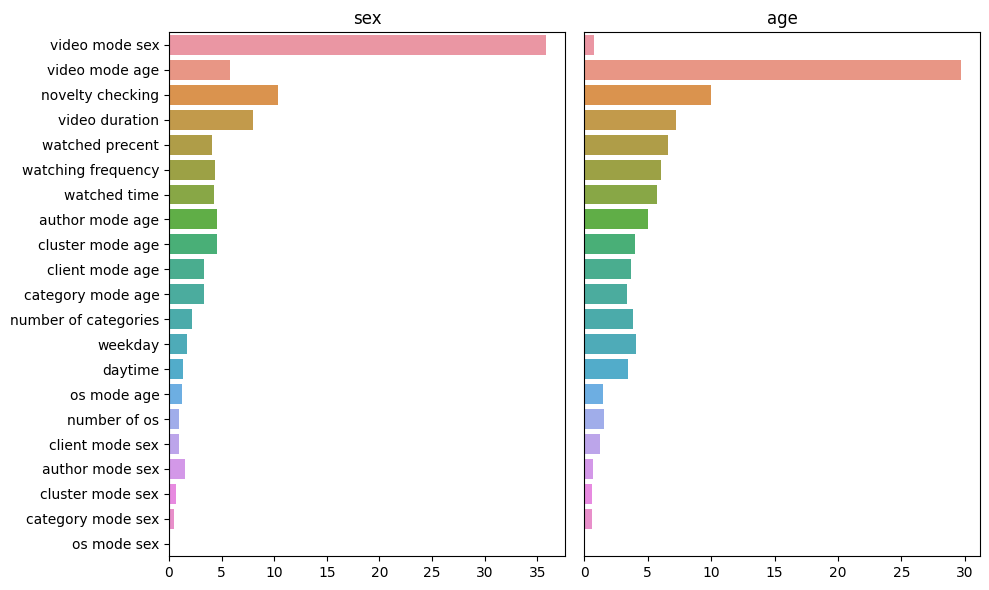

In [28]:
# подсчет важности фич
imps = pd.DataFrame({'sex':model_sex.get_feature_importance(), 'age':model_agec.get_feature_importance()},
    index= #X_vl.columns)
    [
        'cluster mode age', 'cluster mode sex',
        'video mode age', 'video mode sex',
        'category mode age', 'category mode sex',
        'author mode age', 'author mode sex',
        'os mode age', 'os mode sex',
        'client mode age', 'client mode sex',
        'watched time', 'watched precent',
        'novelty checking', 'video duration', 'watching frequency',
        'number of categories', 'number of os',
        'weekday', 'daytime'
    ])
imps = imps.loc[imps.sum(1).sort_values().index[::-1]].reset_index()
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.barplot(data=imps, x='sex', y='index')
plt.title('sex')
plt.ylabel('')
plt.xlabel('')
plt.subplot(122)
plt.title('age')
sns.barplot(data=imps, x='age', y='index')
plt.ylabel('')
plt.xlabel('')
plt.yticks([],[])
plt.tight_layout()
plt.show()

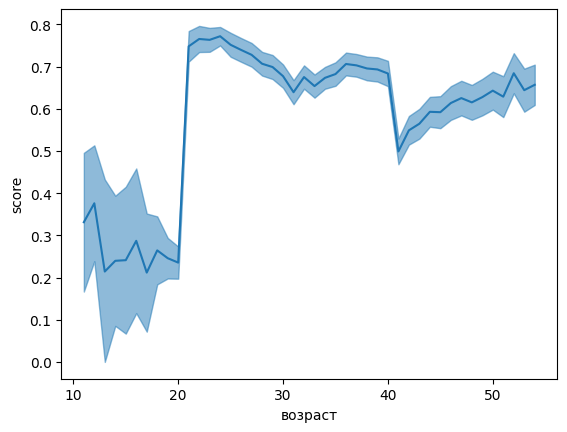

In [29]:
# график качества в зависимости от возраста
def check_plot(predicts):
    if 'age_class' not in predicts.columns:
        age_class_bins = [0, 20, 30, 40, 60] # Возрастные категории пользователей, подробнее в файле с описанием данных
        predicts['age_class'] = pd.cut(predicts['age'], bins=age_class_bins, labels=[0, 1, 2, 3])
    predicts = predicts.sort_values(by='viewer_uid').reset_index(drop=True)

    # counts = data.groupby('viewer_uid').viewer_uid.count().sort_index().reset_index(drop=True)
    counts = val_targets.age
    xs = sorted(counts.unique().tolist())
    ys = []
    err = []
    for c in xs:
        m = counts==c
        f1_weighted = f1_score(val_targets['age_class'].loc[m], predicts['age_class'].loc[m], average='weighted')
        accuracy = accuracy_score(val_targets['sex'].loc[m], predicts['sex'].loc[m])
        ys.append(0.7 * f1_weighted + 0.3 * accuracy)
        err.append(1/(m.sum())**0.5)
    return np.array(xs), np.array(ys), np.array(err)

x, y, e = check_plot(predictions)
sns.lineplot(x=x, y=y)
sns.lineplot(x=x, y=(y+e).clip(0,1), lw=0)
line = sns.lineplot(x=x, y=(y-e).clip(0,1), lw=0).get_lines()
plt.fill_between(line[0].get_xdata(), line[1].get_ydata(), line[2].get_ydata(), color='tab:blue', alpha=.5)
plt.xlabel('возраст')
plt.ylabel('score')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Library/Frameworks/Python.framewor

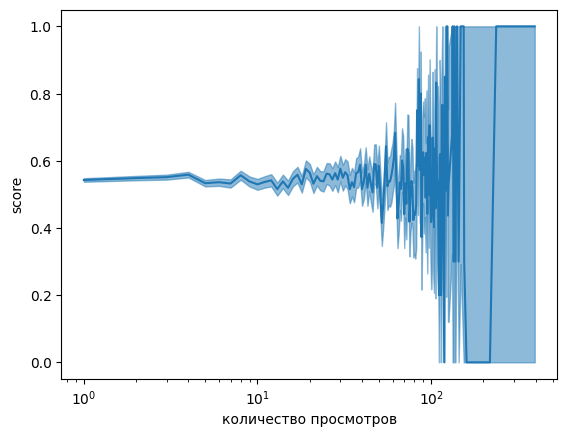

In [30]:
# график качества в зависимости от количества просмотров
def check_plot(predicts):
    if 'age_class' not in predicts.columns:
        age_class_bins = [0, 20, 30, 40, 60] # Возрастные категории пользователей, подробнее в файле с описанием данных
        predicts['age_class'] = pd.cut(predicts['age'], bins=age_class_bins, labels=[0, 1, 2, 3])
    predicts = predicts.sort_values(by='viewer_uid').reset_index(drop=True)

    counts = data.groupby('viewer_uid').viewer_uid.count().sort_index().reset_index(drop=True)
    xs = sorted(counts.unique().tolist())
    ys = []
    err = []
    for c in xs:
        m = counts==c
        f1_weighted = f1_score(val_targets['age_class'].loc[m], predicts['age_class'].loc[m], average='weighted')
        accuracy = accuracy_score(val_targets['sex'].loc[m], predicts['sex'].loc[m])
        ys.append(0.7 * f1_weighted + 0.3 * accuracy)
        err.append(1/(m.sum())**0.5)
    return np.array(xs), np.array(ys), np.array(err)

x, y, e = check_plot(predictions)
sns.lineplot(x=x, y=y)
sns.lineplot(x=x, y=(y+e).clip(0,1), lw=0)
line = sns.lineplot(x=x, y=(y-e).clip(0,1), lw=0).get_lines()
plt.fill_between(line[0].get_xdata(), line[1].get_ydata(), line[2].get_ydata(), color='tab:blue', alpha=.5)
plt.xscale('log')
plt.xlabel('количество просмотров')
plt.ylabel('score')
plt.show()

# Подготовка подачи

In [ ]:
path = './' # Ваш путь до директории с данными /path/to/data/
data = pd.read_csv(path + 'train_events.csv')
video = pd.read_csv(path + 'video_info_v2.csv')
targets = pd.read_csv(path + 'train_targets.csv')

test_data = pd.read_csv(path + 'test_events.csv')

TRAIN_IDS, VAL_IDS = data['viewer_uid'].unique(), test_data['viewer_uid'].unique()

data = pd.concat((data, test_data), axis=0)

In [ ]:
# кодировка временных данных

data['timezone'] = pd.Series(region_timezones).loc[data['region']].values
data['local_event_timestamp'] = data.apply(convert_to_local_time, 1)
data['weekday'] = pd.to_datetime(data['local_event_timestamp']).dt.weekday
data['part of day'] = pd.to_datetime(data['local_event_timestamp']).dt.hour % 6


# кодировка описания видео -- класстеризация

# vectorizer = TfidfVectorizer(
#     max_df=5e-4,
#     min_df=50,
#     stop_words="english",
# )
# X_tfidf = vectorizer.fit_transform(video.title)
with open('vectorizer.pickle','rb') as f:
    vectorizer = load(open('vectorizer.pickle','rb'))
X_tfidf = vectorizer.transform(video.title)
# kmeans = KMeans(
#     n_clusters=10000,
#     max_iter=30,
#     n_init=1,
#     random_state=1,
# ).fit(X_tfidf)
with open('kmeans.pickle','rb') as f:
    kmeans = load(f)
cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
video['cluster_id'] = kmeans.labels_


# обработка категориальных фич: сбор модальных значений пола и медианного возраста по категориям

def get_mode(row):
    counter = Counter(row)
    (most_common, _) = counter.most_common(1)[0]
    return most_common

events = data.merge(video, 'left')
train_events = events[events['viewer_uid'].isin(TRAIN_IDS)].merge(targets, on='viewer_uid', how='inner')

def aggregate_mode_train(cat):
    info = pd.DataFrame({'age': train_events.groupby(cat)['age'].median(), 'sex': train_events.groupby(cat)['sex'].apply(get_mode)})
    _events = events[events['viewer_uid'].isin(TRAIN_IDS)].join(info, on=cat, how='left')
    predicts = pd.DataFrame({
            cat+' age': _events.groupby('viewer_uid')['age'].median(),
            # cat+' var age': _events.groupby('viewer_uid')['age'].std(),
            cat+' sex': _events.groupby('viewer_uid')['sex'].apply(get_mode)
        }).loc[TRAIN_IDS]
    predicts[cat+' age'] = predicts[cat+' age'].fillna(info['age'].median())
    # predicts[cat+' var age'] = predicts[cat+' var age'].fillna(0)
    predicts[cat+' sex'] = predicts[cat+' sex'].fillna(info['sex'].mode()[0])
    return predicts

def aggregate_mode_val(cat):
    info = pd.DataFrame({'age': train_events.groupby(cat)['age'].median(), 'sex': train_events.groupby(cat)['sex'].apply(get_mode)})
    _events = events[events['viewer_uid'].isin(VAL_IDS)].join(info, on=cat, how='left')
    predicts = pd.DataFrame({
            cat+' age': _events.groupby('viewer_uid')['age'].median(),
            # cat+' var age': _events.groupby('viewer_uid')['age'].std(),
            cat+' sex': _events.groupby('viewer_uid')['sex'].apply(get_mode)
        }).loc[VAL_IDS]
    predicts[cat+' age'] = predicts[cat+' age'].fillna(info['age'].median())
    # predicts[cat+' var age'] = predicts[cat+' var age'].fillna(0)
    predicts[cat+' sex'] = predicts[cat+' sex'].fillna(info['sex'].mode()[0])
    return predicts


# обработка вещественных фич: активность, характер просмотра

wt = pd.Series(np.log(data.total_watchtime)).groupby(data['viewer_uid']).median()
wt.name = 'watchtime'
d = data.merge(video, 'left')
perc = pd.Series(-np.log((d.total_watchtime/d.duration))).groupby(data['viewer_uid']).median()
perc.name = 'watched_video_percent'
info = pd.to_datetime(data.event_timestamp).groupby(data.rutube_video_id).min()
dtnew = (pd.to_datetime(data.event_timestamp) - info.loc[data.rutube_video_id].reset_index(drop=True)).groupby(data['viewer_uid']).median()
dtnew.name = 'novelty_following'
md = d.duration.groupby(data['viewer_uid']).median()
md.name = 'video_duration'
data_sorted = data.sort_values(['viewer_uid','event_timestamp'])
mfr = pd.to_datetime(data_sorted.event_timestamp).diff(1).groupby(data_sorted.viewer_uid).median().dt.total_seconds().clip(0)
mfr.name = 'pause_duration'
ndf = d[['category', 'ua_os']].groupby(data['viewer_uid']).nunique()
ndf.columns = ['n_categories', 'n_ua_os']
tf = d[['weekday', 'part of day']].groupby(data['viewer_uid']).median()

X_tr = pd.concat((
    aggregate_mode_train('cluster_id'),
    aggregate_mode_train('rutube_video_id'),
    aggregate_mode_train('category'),
    aggregate_mode_train('author_id'),
    aggregate_mode_train('ua_os'),
    aggregate_mode_train('ua_client_name'),
    wt.loc[TRAIN_IDS], perc.loc[TRAIN_IDS], dtnew.loc[TRAIN_IDS], md.loc[TRAIN_IDS], mfr.loc[TRAIN_IDS],
    ndf.loc[TRAIN_IDS], tf.loc[TRAIN_IDS]
    ), axis=1)
X_vl = pd.concat((
    aggregate_mode_val('cluster_id'),
    aggregate_mode_val('rutube_video_id'),
    aggregate_mode_val('category'),
    aggregate_mode_val('author_id'),
    aggregate_mode_val('ua_os'),
    aggregate_mode_val('ua_client_name'),
    wt.loc[VAL_IDS], perc.loc[VAL_IDS], dtnew.loc[VAL_IDS], md.loc[VAL_IDS], mfr.loc[VAL_IDS],
    ndf.loc[VAL_IDS], tf.loc[VAL_IDS]
    ), axis=1)


# предоработка перед обучением

y_tr = targets.set_index('viewer_uid')[['sex','age']].loc[TRAIN_IDS]
lsex = LabelEncoder().fit(y_tr['sex'])
y_tr['sex'] = lsex.transform(y_tr['sex'])
y_tr['age_class'] = pd.cut(y_tr['age'], bins=[0, 20, 30, 40, 60], labels=[0, 1, 2, 3])

y_vl = targets.set_index('viewer_uid')[['sex','age']].loc[VAL_IDS]
y_vl['sex'] = lsex.transform(y_vl['sex'])

cf = [c+' sex' for c in ['cluster_id', 'rutube_video_id', 'category', 'author_id', 'ua_client_name', 'ua_os']]
for f in cf:
    X_tr[f] = lsex.transform(X_tr[f])
    X_vl[f] = lsex.transform(X_vl[f])
X_tr['novelty_following'] = X_tr['novelty_following'].dt.total_seconds()
X_vl['novelty_following'] = X_vl['novelty_following'].dt.total_seconds()

In [ ]:
# обучение модели на полных данных и прогноз
model_sex = CatBoostClassifier(1000, verbose=False, cat_features=cf).fit(X_tr, y_tr['sex'])
model_agec = CatBoostClassifier(1000, verbose=False, cat_features=cf).fit(X_tr, y_tr['age_class'])
predictions = pd.DataFrame({'viewer_uid': X_vl.index,
    'sex': lsex.inverse_transform(model_sex.predict(X_vl)),
    'age_class': model_agec.predict(X_vl)[:,0],
})
submission = pd.DataFrame(columns=['viewer_uid', 'sex', 'age_class'])
submission['viewer_uid'] = predictions['viewer_uid'].values
submission['sex'] = predictions['sex_mode'].values
submission['age_class'] = predictions['age_class'].values

submission.to_csv('submission.csv', index=False)
submission.head()